In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
df=pd.read_csv('C:/Users/Ankan/Downloads/final_gc_anolomy.csv')

In [2]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)
df  = df[df['building_number']==2]
df.tail()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,weekend,corporate,main_meter_4,main_meter_12,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6
13195,2017-12-31 19:00:00,4221.350523,1417.637935,0.843408,2,1,1,6195.801495,6585.358805,0,0,0,0,0,0,1
13196,2017-12-31 20:00:00,4055.175021,1222.050850,1.051205,2,1,0,3792.986701,6585.358805,0,0,0,0,0,0,1
13197,2017-12-31 21:00:00,3956.379650,1319.480111,2.996915,2,1,0,3792.986701,6585.358805,0,0,0,0,0,0,1
13198,2017-12-31 22:00:00,3693.744589,1254.241443,1.799864,2,1,0,3792.986701,6585.358805,0,0,0,0,0,0,1
13199,2017-12-31 23:00:00,3466.647545,881.760210,1.675097,2,1,0,3792.986701,6585.358805,0,0,0,0,0,0,1


In [3]:
df=df.drop(columns=['sub_meter_2','main_meter','building_number','weekend','corporate','main_meter_4','main_meter_12','day of week_0','day of week_1','day of week_2','day of week_3','day of week_4','day of week_5','day of week_6'])
df=df.set_index('timestamp')
df.head()

,sub_meter_1
timestamp,
2017-01-04 00:00:00,1277.236745
2017-01-04 01:00:00,1485.300838
2017-01-04 02:00:00,1362.784457
2017-01-04 03:00:00,1258.038419
2017-01-04 04:00:00,873.033097


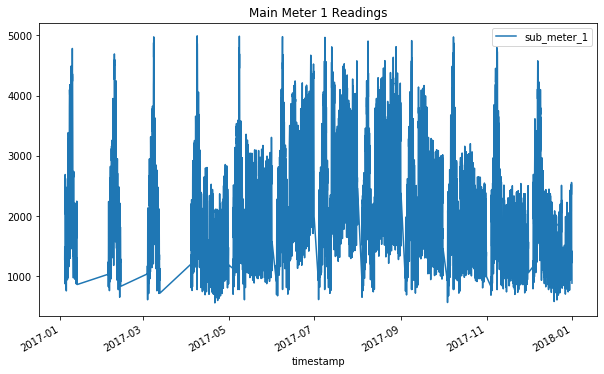

In [4]:
from plotly.offline import plot
import cufflinks as cf
df.plot(title="Main Meter 1 Readings", figsize=(10,6))

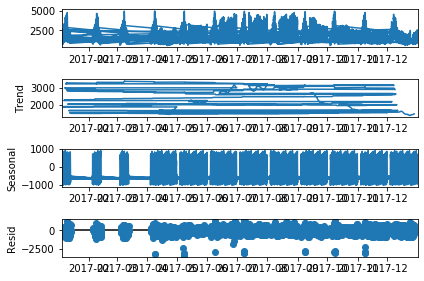

In [5]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive',period=168)
fig=result.plot()

In [6]:
from pmdarima import auto_arima
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=5, max_q=5,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

C:\Users\Ankan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

C:\Users\Ankan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



Fit ARIMA: order=(1, 1, 1); AIC=100295.939, BIC=100323.118, Fit time=0.850 seconds
Fit ARIMA: order=(0, 1, 0); AIC=100512.070, BIC=100525.660, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=100311.380, BIC=100331.764, Fit time=0.031 seconds
Fit ARIMA: order=(0, 1, 1); AIC=100295.086, BIC=100315.470, Fit time=0.016 seconds
Fit ARIMA: order=(0, 1, 2); AIC=100295.472, BIC=100322.651, Fit time=0.078 seconds
Fit ARIMA: order=(1, 1, 2); AIC=100293.077, BIC=100327.050, Fit time=1.088 seconds
Fit ARIMA: order=(2, 1, 2); AIC=99737.919, BIC=99778.687, Fit time=2.957 seconds
Fit ARIMA: order=(2, 1, 1); AIC=100282.369, BIC=100316.343, Fit time=0.857 seconds
Fit ARIMA: order=(2, 1, 3); AIC=99443.737, BIC=99491.300, Fit time=3.954 seconds
Fit ARIMA: order=(3, 1, 4); AIC=99320.313, BIC=99381.465, Fit time=7.825 seconds
Fit ARIMA: order=(2, 1, 4); AIC=99629.796, BIC=99684.154, Fit time=4.486 seconds
Fit ARIMA: order=(4, 1, 4); AIC=98993.321, BIC=99061.268, Fit time=11.046 seconds
Fit ARIMA: or

In [8]:
train = df.loc['01-04-2017 00:00:00':'07-11-2017 00:00:00']
test = df.loc['07-11-2017 00:00:00':]
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(5, 1, 5),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

In [9]:
future_forecast = stepwise_model.predict(n_periods=1320)
future_forecast

array([1000.42182609, 1088.87977561, 1082.95322892, ..., 1318.75852001,
       1332.88977521, 1312.07388647])

In [10]:
a=pd.DataFrame(data=future_forecast)
a.to_csv('updatedb2m2.csv')

# add the code to show actual vs predicted
